# Course 2 week 1 lecture notebook Exercise 03


<a name="combine-features"></a>
## Combine features

In this exercise, you will practice how to combine features in a pandas dataframe.  This will help you in the graded assignment at the end of the week.  

In addition, you will explore why it makes more sense to multiply two features rather than add them in order to create interaction terms.

First, you will generate some data to work with.

In [1]:
# Import pandas
import pandas as pd

# Import a pre-defined function that generates data
from utils import load_data

In [2]:
# Generate features and labels
X, y = load_data(100)

In [3]:
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,78.379387,86.862625,83.344731
1,63.529850,85.439716,77.288707,107.483614
2,69.003986,98.406978,85.411057,118.495893
3,82.638210,100.362697,71.119650,87.737132
4,78.346286,121.854369,92.013270,99.121558


In [4]:
feature_names = X.columns
feature_names

Index(['Age', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol'], dtype='object')

### Combine strings
Even though you can visually see feature names and type the name of the combined feature, you can programmatically create interaction features so that you can apply this to any dataframe.

Use f-strings to combine two strings.  There are other ways to do this, but Python's f-strings are quite useful.

In [5]:
name1 = feature_names[0]
name2 = feature_names[1]

print(f"name1: {name1}")
print(f"name2: {name2}")

name1: Age
name2: Systolic_BP


In [6]:
# Combine the names of two features into a single string, separated by '_&_' for clarity
combined_names = f"{name1}_&_{name2}"
combined_names

'Age_&_Systolic_BP'

### Add two columns
- Add the values from two columns and put them into a new column.
- You'll do something similar in this week's assignment.

In [7]:
X[combined_names] = X['Age'] + X['Systolic_BP']
X.head(2)

,Age,Systolic_BP,Diastolic_BP,Cholesterol,Age_&_Systolic_BP
0,77.19634,78.379387,86.862625,83.344731,155.575726
1,63.52985,85.439716,77.288707,107.483614,148.969566


### Why we multiply two features instead of adding

Why do you think it makes more sense to multiply two features together rather than adding them together?

Please take a look at two features, and compare what you get when you add them, versus when you multiply them together.

In [8]:
# Generate a small dataset with two features
df = pd.DataFrame({'v1': [1,1,1,2,2,2,3,3,3],
                   'v2': [100,200,300,100,200,300,100,200,300]
                  })

# add the two features together
df['v1 + v2'] = df['v1'] + df['v2']

# multiply the two features together
df['v1 x v2'] = df['v1'] * df['v2']
df

,v1,v2,v1 + v2,v1 x v2
0,1,100,101,100
1,1,200,201,200
2,1,300,301,300
3,2,100,102,200
4,2,200,202,400
5,2,300,302,600
6,3,100,103,300
7,3,200,203,600
8,3,300,303,900


It may not be immediately apparent how adding or multiplying makes a difference; either way you get unique values for each of these operations.

To view the data in a more helpful way, rearrange the data (pivot it) so that:
- feature 1 is the row index 
- feature 2 is the column name.  
- Then set the sum of the two features as the value. 

Display the resulting data in a heatmap.

In [10]:
# Import seaborn in order to use a heatmap plot
import seaborn as sns

v1 + v2



v2,100,200,300
v1,,,
1,101,201,301
2,102,202,302
3,103,203,303


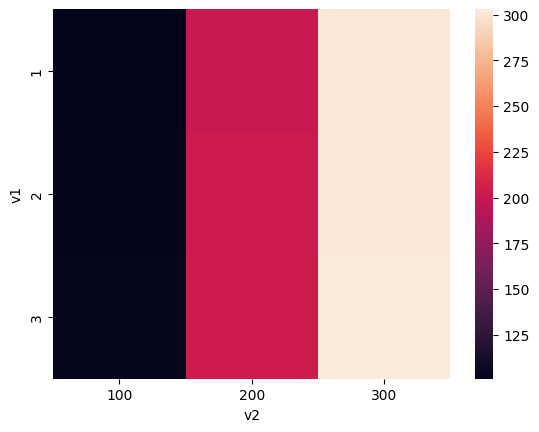

In [11]:
# Pivot the data so that v1 + v2 is the value

df_add = df.pivot(index='v1',
                  columns='v2',
                  values='v1 + v2'
                 )
print("v1 + v2\n")
display(df_add)
print()
sns.heatmap(df_add);

Notice that it doesn't seem like you can easily distinguish clearly when you vary feature 1 (which ranges from 1 to 3), since feature 2 is so much larger in magnitude (100 to 300).  This is because you added the two features together.

#### View the 'multiply' interaction

Now pivot the data so that:
- feature 1 is the row index 
- feature 2 is the column name.  
- The values are 'v1 x v2' 

Use a heatmap to visualize the table.

v1 x v2


v2,100,200,300
v1,,,
1,100,200,300
2,200,400,600
3,300,600,900


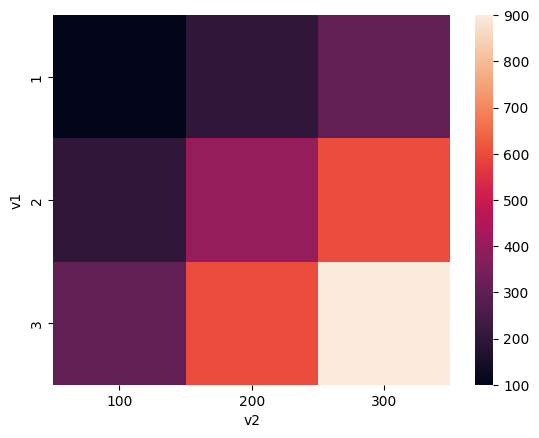

In [12]:
df_mult = df.pivot(index='v1',
                  columns='v2',
                  values='v1 x v2'
                 )
print('v1 x v2')
display(df_mult)
print()
sns.heatmap(df_mult);

Notice how when you multiply the features, the heatmap looks more like a 'grid' shape instead of three vertical bars.  

This means that you are more clearly able to make a distinction as feature 1 varies from 1 to 2 to 3.

### Discussion

When you find the interaction between two features, you ideally hope to see how varying one feature makes an impact on the interaction term.  This is better achieved by multiplying the two features together rather than adding them together.  

Another way to think of this is that you want to separate the feature space into a "grid", which you can do by multiplying the features together.

In this week's assignment, you will create interaction terms!

### This is the end of this practice section.

Please continue on with the lecture videos!

---